<a href="https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/4_2_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 Markov Chains
So how can we do better? Remember, music is a temporal art, and often the order in which things happens is meaningful. The answer: ***conditional probability.*** Conditional probability quantifies the likelihood that an outcome will occur *given that another outcome has already ocurred*. Conditional probability expresses the concept of contingency and is used to describe random processes that depend on something. With music,  we often use conditional probability to express the realtionships between the future and past.

A ***Markov chain*** is a probability system in which the likelihood of *future* outcomes is determined by *past* outcomes. It's a tool for working with conditional probability, and, in this notebook, we'll use Markov chains to model sequence of musical events. Markov chains have two improtant features: the ***order*** which determines how far back past events affect future likelihoods, and the ***transition matrix*** which is a data structure that represents the system of conditional probabilitles.

Note: Markov chains are implements in the `mai` package, so this notebook is mostly about how to use it.

## Setup

In [0]:
# install external libraries for sound playback
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [0]:
# imports
import mai
import random

Using TensorFlow backend.


## Example 1
We'll start with a simple sequence of musical numbers.

In [0]:
# sequence to learn
music = [36, 39, 43, 46]

Let's interpret it as a sequence of drum hits. And hear it.

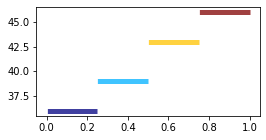

In [0]:
# plot it
mai.make_music_plot(music, durs=0.25, figsize=(4,2))

# play it
mai.make_music(music, durs=0.25, is_drum=True)

## Learn transitions
Now we'll learn a Markov chain transition matrix. First, we have to create a new markov chain to keep track of our data — this is the variable `mark`. Then we learn the transition table by calling the function `train` and passing our example musical sequence `music` as an argument.

In [0]:
# create a new markov chain 
mark = mai.markov.Markov()

# learn a new table from data
mark.train(music, order=1)

View the transition table by calling the function `print_transitions()` --- is this what you expected? The transition table counts the number of times we transition from each state to the next. For each entry of the table, the transition is to the left of the colon and the count is to the right. For instance, `(36,) -> 39 : 1,` means the sequence transitions from the state `36` to the state `39` once. 

In [0]:
# view the transition table
mark.print_transitions()

(36,) -> 39 : 1
(39,) -> 43 : 1
(43,) -> 46 : 1


## Generate a new sequence
This is the fun part. Once we have learned a Markov transition matrix, we can generate new sequences from it! The first thing we must do is set an initial state, otherwise the Markov chain wouldn't know where to start, then call the function `choose` to choose the next state according to the transition table.

In [0]:
# set initial state
mark.state = (36,)

# next choice
mark.choose()

39

You can continue to call choose as many times as you wish... until you get an error!!! NOTE: in the following cell we omit the line of code that sets the initial state because we do not want to reset our initial state each time.



In [0]:
# next choice
mark.choose()

LookupError: ignored

If you call `choose` too many times on this particular transition table you eventually get the error: `LookupError: Current state not found in transition table`. The problem is we eventually transition *to* the state `46` but there is no entry in the transition table that tells us where to go *from* state `46`. This is because state `46` is the last number in the sequence that we learned from.

Click `.choose()` over and over again is a bit tedious. You can ask for multiples choices at a time using `mark.choice()`. But don't ask for more than 3 on this example!

In [0]:
# reset initial state
mark.state = (36,)

# generate 3 choices
new_music = mark.choice(k=3)

# print it
print(new_music)

[36, 39, 43, 46]


And hear it.

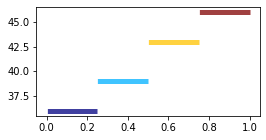

In [0]:
# plot it
mai.make_music_plot(new_music, durs=0.25, figsize=(4,2))

# play it
mai.make_music(new_music, durs=0.25, is_drum=True)

OK, so how can we avoid that error? Hint, you can do it by adding one more note to the original melody...

## Example 2
Here we add one additional value to our original sequence in order to avoid the error above. We create a loop where the sequence begins and ends on the same value, `36`.

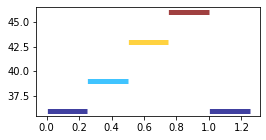

In [0]:
# sequence to train on
music = [36, 39, 43, 46, 36]

# plot it
mai.make_music_plot(music, durs=0.25, figsize=(4,2))

# play it
mai.make_music(music, durs=0.25, is_drum=True)

Create a new Markov chain and train it on the sequence.

In [0]:
# create a new markov chain 
mark = mai.markov.Markov()

# learn a new table from data
mark.train(music, order=1)

View the transition table.

In [0]:
# view the transition table
mark.print_transitions()

(36,) -> 39 : 1
(39,) -> 43 : 1
(43,) -> 46 : 1
(46,) -> 36 : 1


Set the initial state

In [0]:
# set initial state
mark.state = (36,)

Generate a new sequence one at a time. You should **not** get an error this time. What happens instead?

In [0]:
# next choice
mark.choose()

36

Generate a sequence of 16 choices and plot it.

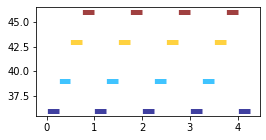

In [0]:
# set initial state
mark.state = (36,)

# generate a new sequence
music = mark.choice(k=16)

# let's see it
mai.make_music_plot(music, durs=0.25, figsize=(4,2))

# let's hear it
mai.make_music(music, durs=0.25, is_drum=True)

Not terribly exciting, no. In fact, the new sequence is exactly the same as the orginal, just looped over and over again! Hmmm, why is that? And how can we make it be different?

## Example 3
The Markov chain in example 2 is *deterministic*. It loops the same sequence over and over and over again without fail. This occurs because there is only one option for each previous state to transition to. How would you change the training sequence to make the Markov model *non-deterministic*? Hint, you only need to add one more note to the previous melody.

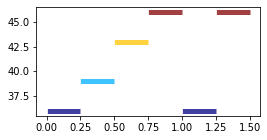

In [0]:
# sequence to learn
music = [36, 39, 43, 46, 36, 46]

# plot it
mai.make_music_plot(music, durs=0.25, figsize=(4,2))

# play it
mai.make_music(music, durs=0.25, is_drum=True)

Create a new Markov chain and train it.

In [0]:
# create a new markov chain 
mark = mai.markov.Markov()

# learn a new table from data
mark.train(music, order=1)

View the transition table.

In [0]:
# view the transition table
mark.print_transitions()

(36,) -> 39 : 1
(39,) -> 43 : 1
(43,) -> 46 : 1
(46,) -> 36 : 1
(36,) -> 46 : 1


**Important:** Notice that the state `36` occurs ***twice*** on the `from` side of the transition table. This is crucial. There are now two possible transitions from the state `36`. 

When we use this model to generate a new sequence, we'll have two possibilities that can follow the number `36`. The Markov chain will choose randomly betwee each of the options, using the counts as probability weights. Try it out below.

Generate a sequence one at a time.

In [0]:
# set initial state
mark.state = (36,)

In [0]:
# next choice
mark.choose()

46

Generate a new sequence of 16 choices and plot it. How does this compare to the orginal? The new sequence is not (necessarily) an exact copy of the original, but more like cut up and rearranged segments of the original.

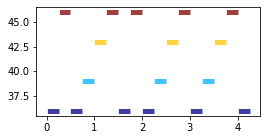

In [0]:
# set initial state
mark.state = (36,)

# generate a new sequence
music = mark.choice(k=16)

# let's see it
mai.make_music_plot(music, durs=0.25, figsize=(4,2))

# let's hear it
mai.make_music(music, durs=0.25, is_drum=True)

Hopefully these simple sequence are helping your intuition develop. We'll move onto some music in just a moment, but first, a bonus example.

## Text
These Markov chain objects can process more than just numbers... Let's try text. Text i just a sequence of letters, or `characters`.

In [0]:
# sequence to learn
music = "How are you doing today? I'm fine, wish the weather were nicer. Hey it's pretty sunny out over here! Oh that's great."

Create a new Markov chain and train on a sequence.

In [0]:
# create a new markov chain 
mark = mai.markov.Markov()

# learn a new table from data
mark.train(music, order=1)

View transition table.

In [0]:
# view the transition table
mark.print_transitions()

('H',) -> o : 1
('o',) -> w : 1
('w',) ->   : 1
(' ',) -> a : 1
('a',) -> r : 1
('r',) -> e : 5
('e',) ->   : 3
(' ',) -> y : 1
('y',) -> o : 1
('o',) -> u : 2
('u',) ->   : 1
(' ',) -> d : 1
('d',) -> o : 1
('o',) -> i : 1
('i',) -> n : 2
('n',) -> g : 1
('g',) ->   : 1
(' ',) -> t : 3
('t',) -> o : 1
('o',) -> d : 1
('d',) -> a : 1
('a',) -> y : 1
('y',) -> ? : 1
('?',) ->   : 1
(' ',) -> I : 1
('I',) -> ' : 1
("'",) -> m : 1
('m',) ->   : 1
(' ',) -> f : 1
('f',) -> i : 1
('n',) -> e : 1
('e',) -> , : 1
(',',) ->   : 1
(' ',) -> w : 3
('w',) -> i : 1
('i',) -> s : 1
('s',) -> h : 1
('h',) ->   : 2
('t',) -> h : 3
('h',) -> e : 3
('w',) -> e : 2
('e',) -> a : 2
('a',) -> t : 3
('e',) -> r : 5
('r',) ->   : 2
(' ',) -> n : 1
('n',) -> i : 1
('i',) -> c : 1
('c',) -> e : 1
('r',) -> . : 1
('.',) ->   : 1
(' ',) -> H : 1
('H',) -> e : 1
('e',) -> y : 1
('y',) ->   : 3
(' ',) -> i : 1
('i',) -> t : 1
('t',) -> ' : 2
("'",) -> s : 2
('s',) ->   : 2
(' ',) -> p : 1
('p',) -> r : 1
('e',) -

Generate a new sequence.

In [0]:
# set initial state
mark.state = ('H',)

# generate a new sequence
music = mark.choice(k=100)

# let's see it
print(music)

['H', 'o', 'u', 't', 'y', 'o', 'u', ' ', 't', 'y', 'o', 'w', ' ', 'a', 'y', ' ', 'f', 'i', 'n', 'y', ' ', 't', 'h', 'e', 'a', 't', 'h', 'a', 't', 'y', '?', ' ', 'w', 'i', 'c', 'e', 'r', ' ', 't', ' ', 'h', ' ', 'y', ' ', 't', 'h', ' ', 'y', ' ', 'I', "'", 's', 'h', 'e', 't', 'h', ' ', 'n', 'i', 'n', 'i', 't', 'h', 'e', ',', ' ', 'I', "'", 'm', ' ', 'd', 'o', 'u', ' ', 't', 'y', 'o', 'u', ' ', 'p', 'r', 'e', 'r', 'e', '!', ' ', 't', ' ', 's', ' ', 'H', 'o', 'i', 'n', 'y', ' ', 'a', 't', 'h', 'e', 'r']


We can make that look a bit nicer. Don't sorry about the code here.

In [0]:
from functools import reduce

print(reduce(lambda x,y: x+y, music))

Houtyou tyow ay finy theathaty? wicer t h y th y I'sheth ninithe, I'm dou tyou prere! t s Hoiny ather
